[ 33.2  98.4 164.6 230.7 295.9 362.1 428.4 495.9]
66.03095238095239 -33.48928571428574
[ 61.1 124.8 189.3 253.8 319.3 388.  457.2 522.3]
66.0952380952381 -7.953571428571419
[ 58.4 182.6 305.9 430.1]
123.83999999999996 -65.34999999999987
[ 16.4  53.1  88.7 125.3 162.3 198.7 235.1 271.2 307.6 343.8]
36.40242424242424 -19.993333333333425
[ 34.4  68.7 104.9 141.2 177.5 213.2 249.1 285.2 321.6 358. ]
36.02181818181819 -2.7400000000000992
[ 32.6 102.  173.1 242.9 312.6 383.2 454.2 525.3]
70.35595238095239 -38.364285714285785


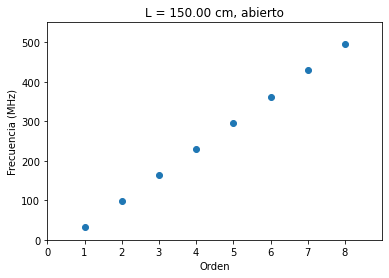

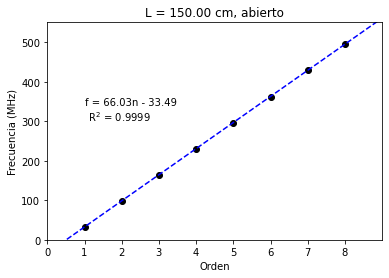

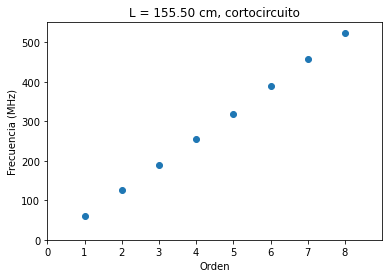

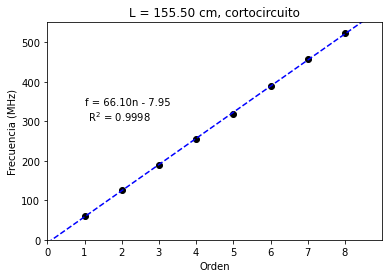

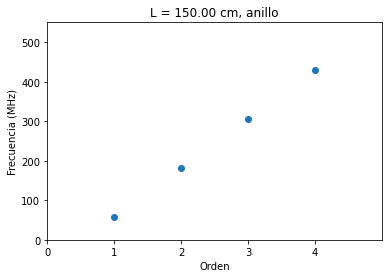

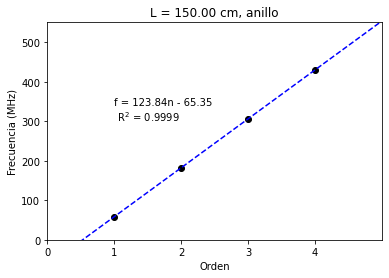

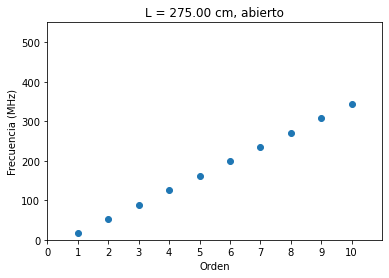

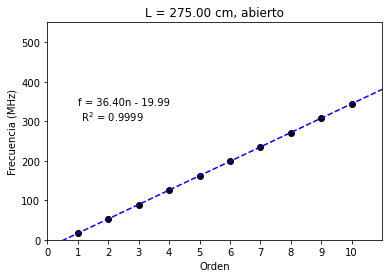

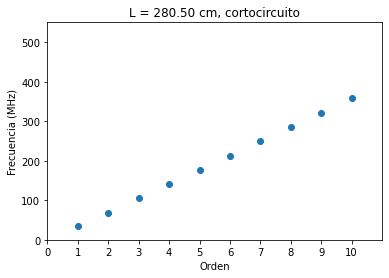

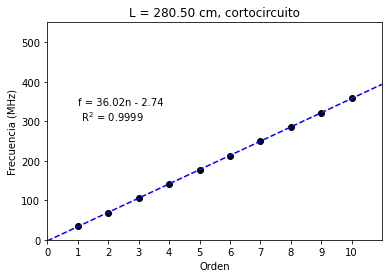

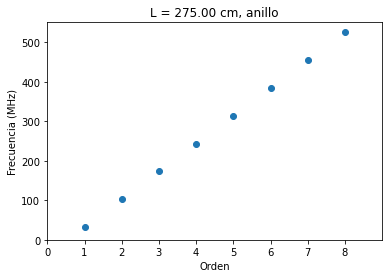

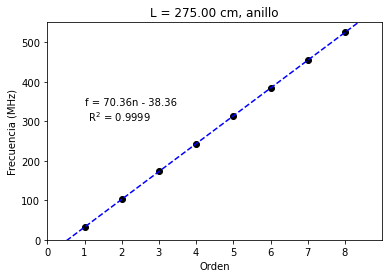

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx", sheet_name = "Sheet2").to_numpy()
def linest(y, i, tit):
    x = list(range(len(y) + 1))[1:]
    m, b = np.polyfit(x, y, 1)
    print(m, b)
    plt.figure(i + 7)
    plt.plot(x, y, 'ko', list(range(len(y) + 2)), m * np.asarray(list(range(len(y) + 2))) + b, '--b')
    plt.title(tit)
    plt.xticks(list(range(len(y) + 1)))
    plt.ylabel("Frecuencia (MHz)")
    plt.xlabel("Orden")
    plt.ylim(0, 550)
    plt.xlim(0, len(y) + 1)
    r = 0.9998 if i == 1 else 0.9999
    txt = "f = " + str(format(round(m, 2), '.2f')) + "n - " + str(abs(round(b, 2))) + "\n R$^2$ = " + str(r) 
    plt.text(1, 300, txt)


for i in range(0, 6):
    y = df[:,i][~np.isnan(df[:,i])]
    print(y)
    plt.figure(i + 1)
    plt.plot(list(range(len(y) + 1))[1:], y, "o")
    plt.ylim(0, 550) #comentar si queda peor.
    plt.xlim(0, len(y) + 1)
    #plt.grid()
    tit = ["L = 150.00 cm, abierto", "L = 155.50 cm, cortocircuito", "L = 150.00 cm, anillo",
          "L = 275.00 cm, abierto", "L = 280.50 cm, cortocircuito", "L = 275.00 cm, anillo"]
    plt.title(tit[i])
    plt.xticks(list(range(len(y) + 1)))
    plt.ylabel("Frecuencia (MHz)")
    plt.xlabel("Orden")
    linest(y, i, tit[i])